# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"



### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}"
response_url = requests.get(query_url).json()


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city
    response = requests.get(city_url).json()
    #pprint(response)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather_response = requests.get(city_url).json() 
        #pprint(city_weather_response)
    
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response["coord"]["lat"]
        city_lng = city_weather_response["coord"]["lon"]
        city_max_temp = city_weather_response["main"]["temp_max"]
        city_humidity = city_weather_response["main"]["humidity"]
        city_clouds = city_weather_response["clouds"]["all"]
        city_wind = city_weather_response["wind"]["speed"]
        city_country = city_weather_response["sys"]["country"]
        city_date = city_weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | yamaranguila
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | port hardy
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | bathsheba
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | amahai
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | berezovyy
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | rawson
Processing Rec

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,39.94,76,92,1.01,US,1675710376
1,hermanus,-34.4187,19.2345,72.81,86,19,11.72,ZA,1675710716
2,wadi musa,30.3222,35.4793,37.26,89,88,24.32,JO,1675710781
3,vaini,-21.2000,-175.2000,78.73,73,100,2.35,TO,1675710710
4,lingao,19.9103,109.6859,69.66,92,3,11.36,CN,1675710784


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,39.94,76,92,1.01,US,1675710376
1,hermanus,-34.4187,19.2345,72.81,86,19,11.72,ZA,1675710716
2,wadi musa,30.3222,35.4793,37.26,89,88,24.32,JO,1675710781
3,vaini,-21.2000,-175.2000,78.73,73,100,2.35,TO,1675710710
4,lingao,19.9103,109.6859,69.66,92,3,11.36,CN,1675710784


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

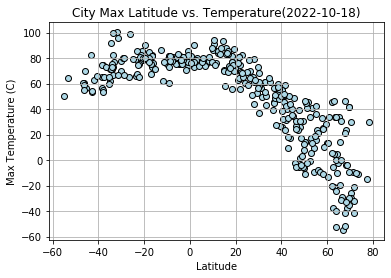

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o", facecolors="lightBlue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

**This plot suggests that temperatures gradually decreases for the Cities above the equator (from 0 to 90 degress latitude) compared to the cities below the equator. Locations belowo the equator tends to have hight max temperature.

#### Latitude Vs. Humidity

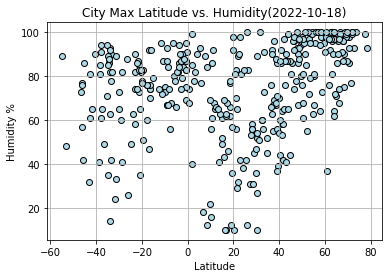

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o", facecolors="lightBlue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

**This plot indicates that there no significant relationship betweeen Latitude and Humidity

#### Latitude Vs. Cloudiness

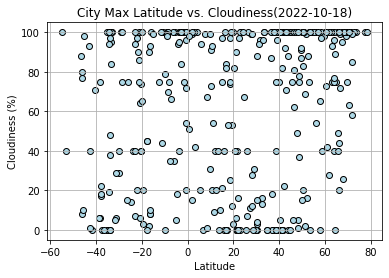

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o", facecolors="lightBlue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

**This plot shows that there no significant relationship betweeen Latitude and city's cloudiness

#### Latitude vs. Wind Speed Plot

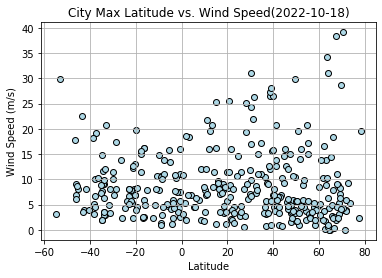

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o", facecolors="lightBlue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

**This plot indicates that there no significant relationship betweeen Latitude and city's wind speed.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
regress = city_data_df["Lat"] * slope + intercept

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,39.94,76,92,1.01,US,1675710376
2,wadi musa,30.3222,35.4793,37.26,89,88,24.32,JO,1675710781
4,lingao,19.9103,109.6859,69.66,92,3,11.36,CN,1675710784
5,portland,45.5234,-122.6762,49.01,86,75,12.66,US,1675710492
6,barrow,71.2906,-156.7887,-9.38,77,100,0.00,US,1675710791


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,72.81,86,19,11.72,ZA,1675710716
3,vaini,-21.2000,-175.2000,78.73,73,100,2.35,TO,1675710710
8,mataura,-46.1927,168.8643,60.35,57,77,9.17,NZ,1675710657
9,ancud,-41.8697,-73.8203,62.51,65,0,8.03,CL,1675710798
11,tolaga bay,-38.3667,178.3000,65.57,81,6,3.09,NZ,1675710576


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.738563157904652


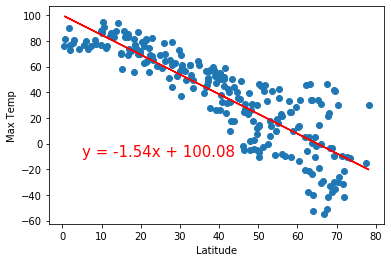

In [ ]:
# Linear regression on Northern Hemisphere
x_northern_values = northern_hemi_df["Lat"]
y_northern_values = northern_hemi_df["Max Temp"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern_values, y_northern_values)

regress_northern_values = x_northern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_northern_values,y_northern_values)
plt.plot(x_northern_values,regress_northern_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig5.png")

plt.show()

**As cities in the northern hemisphere moves farther away from the equator, temperatures drop.
This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.
The r-squred : 0.738563157904652 can explaing approximately 74% of the variability in the data

The r-squared is: 0.22072603316225178


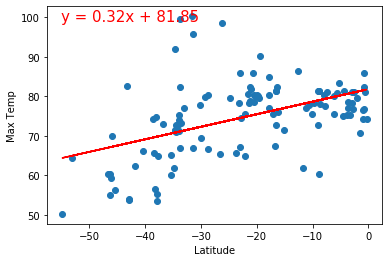

In [ ]:
# Linear regression on Southern Hemisphere
x_southern_values = southern_hemi_df["Lat"]
y_southern_values = southern_hemi_df["Max Temp"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern_values, y_southern_values)

regress_southern_values = x_southern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_southern_values,y_southern_values)
plt.plot(x_southern_values,regress_southern_values,"r-")
plt.annotate(line_eq,(-55,99),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig6.png")

plt.show()

**As some cities in the southern hemisphere move closer to the equator, temperatures rises.
This proves a slight positive correlation between latitude and temperature in the southern hemisphere.
The regression line only explains 22% of the variability in the data.

# 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19336238299408703


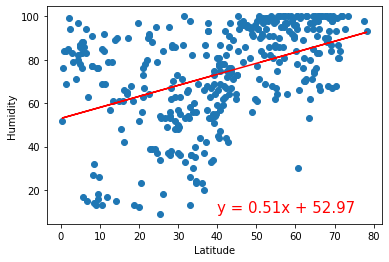

In [ ]:
# Northern Hemisphere

x_northern_values = northern_hemi_df["Lat"]
y_northern_values = northern_hemi_df["Humidity"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern_values, y_northern_values)

regress_northern_values = x_northern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_northern_values,y_northern_values)
plt.plot(x_northern_values,regress_northern_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig7.png")

plt.show()

**The regression line captures 19% of the variability in the data. The regression does not display any significant correlation between the factors

The r-squared is: 0.11852810722719474


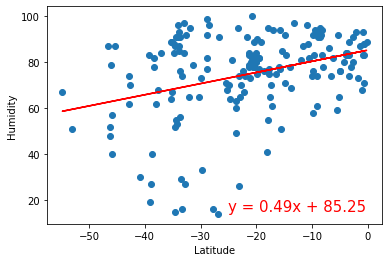

In [ ]:
# Southern Hemisphere

x_southern_values = southern_hemi_df["Lat"]
y_southern_values = southern_hemi_df["Humidity"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern_values, y_southern_values)

regress_southern_values = x_southern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_southern_values,y_southern_values)
plt.plot(x_southern_values,regress_southern_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig8.png")

plt.show()

**The regression line does not capture most of the variability in the data set and doesn't show much of a correlation between data sets. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09744303287730718


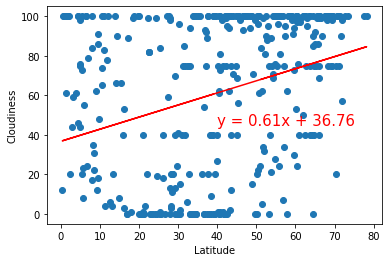

In [ ]:
# Northern Hemisphere

x_northern_values = northern_hemi_df["Lat"]
y_northern_values = northern_hemi_df["Cloudiness"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern_values, y_northern_values)

regress_northern_values = x_northern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_northern_values,y_northern_values)
plt.plot(x_northern_values,regress_northern_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig9.png")

plt.show()

**The regression line only captures 10% of the variability in the data set and doesn't show much of a correlation between data sets. 

The r-squared is: 0.14650828629584114


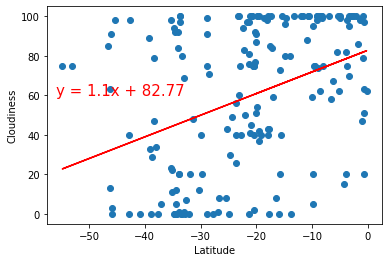

In [ ]:
# Southern Hemisphere
x_southern_values = southern_hemi_df["Lat"]
y_southern_values = southern_hemi_df["Cloudiness"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern_values, y_southern_values)

regress_southern_values = x_southern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_southern_values,y_southern_values)
plt.plot(x_southern_values,regress_southern_values,"r-")
plt.annotate(line_eq,(-56,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig10.png")

plt.show()

**The regression line does not capture most of the variability in the data set and doesn't show much of a correlation between data sets. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0017276819899557708


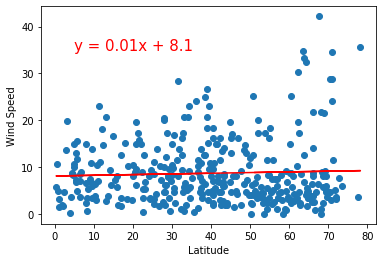

In [ ]:
# Northern Hemisphere

x_northern_values = northern_hemi_df["Lat"]
y_northern_values = northern_hemi_df["Wind Speed"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern_values, y_northern_values)

regress_northern_values = x_northern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_northern_values,y_northern_values)
plt.plot(x_northern_values,regress_northern_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig11.png")

plt.show()

**The regression line does not capture most of the variability in the data set and doesn't show much of a correlation between data sets. There is no significant relationship between Wind Speed and Latitude.

The r-squared is: 0.04426132231124988


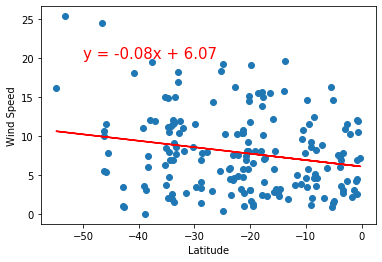

In [ ]:
# Southern Hemisphere

x_southern_values = southern_hemi_df["Lat"]
y_southern_values = southern_hemi_df["Wind Speed"]

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern_values, y_southern_values)

regress_southern_values = x_southern_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_southern_values,y_southern_values)
plt.plot(x_southern_values,regress_southern_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig12.png")

plt.show()

**The regression line captures only 4% of the variability in the data set and doesn't show much of a correlation between data sets. There is no significant relationship between southern hemisphere latitude and wind speed.